<a href="https://colab.research.google.com/github/yiyukk/DeloitteProject/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances

import folium
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import MarkerCluster
import branca.colormap as cm

import plotly.express as px
from folium.plugins import MarkerCluster


import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#import hdbscan


In [ ]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the base path and data path
base_path = '/content/drive/Shared drives/Deloitte'
data_path = base_path + '/Cleaned Data'


MessageError: Error: credential propagation was unsuccessful

In [ ]:
current_customers = pd.read_csv(data_path + '/eda_cleaned.csv')
current_customers.columns

Index(['sales_representative_id', 'id', 'latitude', 'longitude',
       'sales_representative_latitude', 'sales_representative_longitude',
       'distance', 'city', 'store_size', 'free_wifi', 'parking',
       'date_opening', 'store_size_category', 'opening_hour', 'closing_hour',
       'customer_category', 'distance_rep_cust_km', 'rating',
       'number_of_reviews', 'sales_amount', 'number_of_employees',
       'population', 'young_population', 'gdp_per_capita', 'unemployment_rate',
       'days_active', 'open_duration_hours', 'young_population_rate',
       'opening_bin', 'closing_bin', 'time_period'],
      dtype='object')

In [ ]:
current_customers = current_customers.drop(columns=['population', 'young_population','gdp_per_capita','unemployment_rate','days_active','open_duration_hours','young_population_rate','opening_bin','closing_bin','opening_hour', 'closing_hour', 'store_size_category', 'distance_rep_cust_km'])

In [ ]:
current_customers.rename(columns={'sales_amount': 'sales'}, inplace=True)
current_customers['active'] = 1


In [ ]:
current_customers.columns

Index(['sales_representative_id', 'id', 'latitude', 'longitude',
       'sales_representative_latitude', 'sales_representative_longitude',
       'distance', 'city', 'store_size', 'free_wifi', 'parking',
       'date_opening', 'customer_category', 'rating', 'number_of_reviews',
       'sales', 'number_of_employees', 'time_period', 'active'],
      dtype='object')

In [ ]:
sum(current_customers['sales'])

307148081.2950744

In [ ]:
potential_customers = pd.read_csv(data_path + '/data_with_predictions.csv')
potential_customers.columns

Index(['id', 'distance', 'city', 'opening_hours', 'phone_number',
       'number_of_employees', 'free_wifi', 'parking', 'description',
       'zip_code', 'latitude', 'longitude', 'date_opening', 'store_size',
       'rating', 'number_of_reviews', 'time_period', 'customer_category',
       'predicted_sales'],
      dtype='object')

In [ ]:
potential_customers = potential_customers.drop(columns=['phone_number','description', 'zip_code','opening_hours'])

In [ ]:
potential_customers.rename(columns={'predicted_sales': 'sales'}, inplace=True)
potential_customers['active'] = 0


In [ ]:
sum(potential_customers['sales']) +sum(current_customers['sales'])

1877157686.259638

In [ ]:
potential_customers.columns

Index(['id', 'distance', 'city', 'number_of_employees', 'free_wifi', 'parking',
       'latitude', 'longitude', 'date_opening', 'store_size', 'rating',
       'number_of_reviews', 'time_period', 'customer_category', 'sales',
       'active'],
      dtype='object')

In [ ]:
df = pd.concat([current_customers, potential_customers], ignore_index=True)
data = pd.concat([current_customers, potential_customers], ignore_index=True)
df.shape

(48203, 19)

In [ ]:
df.head()

,sales_representative_id,id,latitude,longitude,sales_representative_latitude,sales_representative_longitude,distance,city,store_size,free_wifi,parking,date_opening,customer_category,rating,number_of_reviews,sales,number_of_employees,time_period,active,cluster
0,22.0,2.0,43.351256,-8.410301,43.362927,-8.402358,31.681670,A Coruña,122.1635,1,0,2020-02-17,Bar/Pub,4.140,13.0,38363.039529,29.0,Evening to Morning,1,2
1,10.0,3.0,43.255756,-2.939133,43.262941,-2.935849,29.656813,Bilbao,71.1614,1,1,2019-04-15,Restaurant,3.916,22.0,26352.777120,36.0,Afternoon to Late Night,1,2
2,15.0,4.0,38.354208,-0.505718,38.300530,-0.604413,31.277988,Alicante,75.7135,1,0,2019-04-17,Restaurant,3.803,33.0,27910.264616,26.0,Morning to Evening,1,0
3,29.0,5.0,40.463496,-3.635538,40.453918,-3.654711,38.071841,Madrid,215.2493,1,1,2019-04-05,Hotel,3.958,47.0,33478.441029,31.0,Morning to Evening,1,0
4,8.0,6.0,39.472037,-6.371697,39.474834,-6.363447,38.649910,Caceres,252.1306,0,0,2018-06-15,Hotel,4.932,46.0,33487.927742,29.0,Morning to Evening,1,0


In [ ]:
coords = df[['latitude', 'longitude']].values
rads = np.radians(coords)
rads

array([[ 0.75662215, -0.14678745],
       [ 0.75495537, -0.05129754],
       [ 0.6694072 , -0.00882645],
       ...,
       [ 0.72676044, -0.01458276],
       [ 0.7050783 , -0.06453409],
       [ 0.72242394,  0.03819681]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

caler = MinMaxScaler()
df['scaled_sales'] = scaler.fit_transform(df[['sales']])

In [ ]:
combined_data = np.hstack((rads, df[['scaled_sales']].values))

In [ ]:
combined_data

array([[ 0.75662215, -0.14678745, -0.10361045],
       [ 0.75495537, -0.05129754, -2.25015608],
       [ 0.6694072 , -0.00882645, -1.97179264],
       ...,
       [ 0.72676044, -0.01458276,  1.41061632],
       [ 0.7050783 , -0.06453409,  2.29325606],
       [ 0.72242394,  0.03819681,  2.89782817]])

In [ ]:
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using the elbow method
inertia = []
sil_scores = []
K = range(2, 11)  # Silhouette score cannot be calculated for a single cluster
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_data)
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score
    labels = kmeans.labels_
    sil_score = silhouette_score(combined_data, labels)
    sil_scores.append(sil_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, sil_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

# Choose the optimal number of clusters (k) based on the silhouette score
optimal_k = K[np.argmax(sil_scores)]

In [ ]:
df['location_cluster'] = location_clusters
df

,sales_representative_id,id,latitude,longitude,sales_representative_latitude,sales_representative_longitude,distance,city,store_size,free_wifi,...,date_opening,customer_category,rating,number_of_reviews,sales,number_of_employees,time_period,active,cluster,location_cluster
0,22.0,2.0,43.351256,-8.410301,43.362927,-8.402358,31.681670,A Coruña,122.1635,1,...,2020-02-17,Bar/Pub,4.140,13.0,38363.039529,29.0,Evening to Morning,1,2,2731
1,10.0,3.0,43.255756,-2.939133,43.262941,-2.935849,29.656813,Bilbao,71.1614,1,...,2019-04-15,Restaurant,3.916,22.0,26352.777120,36.0,Afternoon to Late Night,1,2,3376
2,15.0,4.0,38.354208,-0.505718,38.300530,-0.604413,31.277988,Alicante,75.7135,1,...,2019-04-17,Restaurant,3.803,33.0,27910.264616,26.0,Morning to Evening,1,0,3560
3,29.0,5.0,40.463496,-3.635538,40.453918,-3.654711,38.071841,Madrid,215.2493,1,...,2019-04-05,Hotel,3.958,47.0,33478.441029,31.0,Morning to Evening,1,0,4380
4,8.0,6.0,39.472037,-6.371697,39.474834,-6.363447,38.649910,Caceres,252.1306,0,...,2018-06-15,Hotel,4.932,46.0,33487.927742,29.0,Morning to Evening,1,0,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48198,NaN,10427.0,37.385244,-5.993674,NaN,NaN,28.010804,Sevilla,50.8163,1,...,2008-03-19,Restaurant,5.000,122.0,48381.253556,31.0,Morning to Evening,0,3,5095
48199,NaN,20956.0,43.352722,-8.397329,NaN,NaN,36.723765,A Coruña,341.5004,0,...,2008-01-01,Hotel,5.000,329.0,61537.219078,29.0,Morning to Evening,0,3,1225
48200,NaN,19942.0,41.640306,-0.835531,NaN,NaN,31.264910,Zaragoza,216.5499,1,...,2007-12-08,Hotel,5.000,87.0,46835.377886,32.0,Morning to Evening,0,3,-1
48201,NaN,33810.0,40.398011,-3.697531,NaN,NaN,26.856137,Madrid,352.2768,1,...,2007-12-03,Hotel,5.000,166.0,51773.886876,29.0,Morning to Evening,0,3,7000


In [ ]:
#Features used for clustering that are seen as features of our best customers
coordinates = df[['latitude', 'longitude']]
#categorical = df[['customer_category']]
numerical = df[['sales']]

In [ ]:
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Preprocessing for coordinates (latitude and longitude)
#coordinates_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#    ('scaler', StandardScaler())
#])

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['sales']),
        #('cat', categorical_transformer, ['customer_category']),
        ('coord', coordinates_transformer, ['latitude', 'longitude'])
    ])

# Create a pipeline that combines preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocess the data
df_preprocessed = pipeline.fit_transform(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

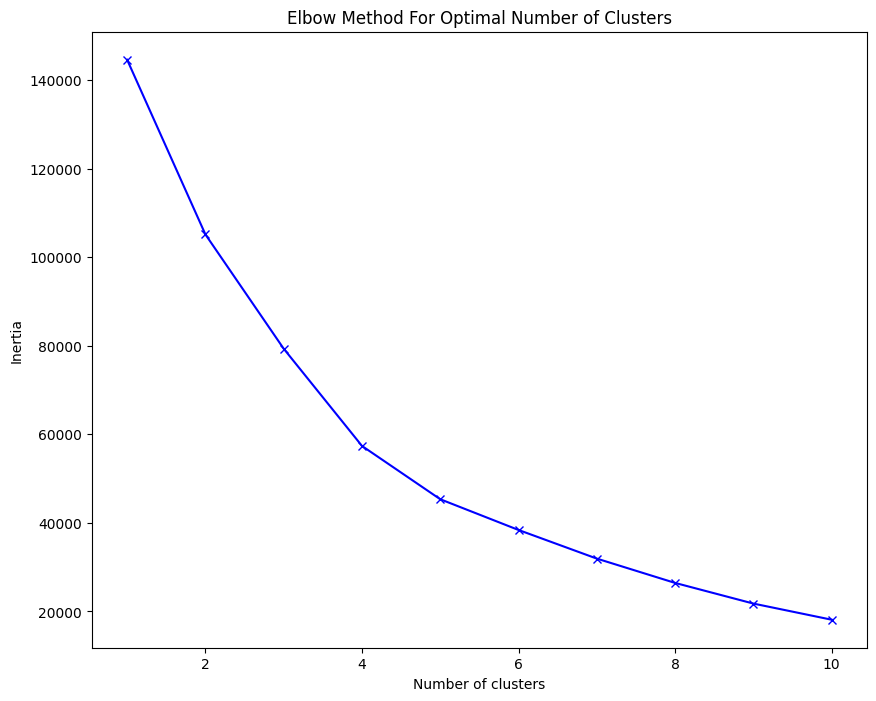

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
def calculate_optimal_k(df_preprocessed):
    inertia = []
    K = range(1, 11)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_preprocessed)
        inertia.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(10, 8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.show()

    # Calculate the optimal number of clusters
    diff = np.diff(inertia)
    diff_r = diff[1:] / diff[:-1]
    optimal_k = np.argwhere(diff_r < 0.1)[0][0] + 2  # +2 because diff and diff_r are offset by 2

    return optimal_k

# Calculate the optimal number of clusters
optimal_k = calculate_optimal_k(df_preprocessed)
print(f'The optimal number of clusters is {optimal_k}')

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

# Fit the model
pipeline.fit(df)

# Predict clusters
df['cluster'] = pipeline.predict(df)

# Inspect the first few rows
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   sales_representative_id   id   latitude  longitude  \
0                     22.0  2.0  43.351256  -8.410301   
1                     10.0  3.0  43.255756  -2.939133   
2                     15.0  4.0  38.354208  -0.505718   
3                     29.0  5.0  40.463496  -3.635538   
4                      8.0  6.0  39.472037  -6.371697   

   sales_representative_latitude  sales_representative_longitude   distance  \
0                      43.362927                       -8.402358  31.681670   
1                      43.262941                       -2.935849  29.656813   
2                      38.300530                       -0.604413  31.277988   
3                      40.453918                       -3.654711  38.071841   
4                      39.474834                       -6.363447  38.649910   

       city  store_size  free_wifi  parking date_opening customer_category  \
0  A Coruña    122.1635          1        0   2020-02-17           Bar/Pub   
1    Bilbao     71.1614   

looking at the graph and the optimal_k, only 4/5 clusters should be used

In [ ]:
n_geo_clusters = 4
geo_kmeans = KMeans(n_clusters=n_geo_clusters, random_state=42, n_init=20)
geo_clusters = geo_kmeans.fit_predict(scaled_coordinates)

df['geo_cluster'] = geo_clusters
data['geo_cluster'] = geo_clusters

In [ ]:
fig = px.scatter(df, x='latitude', y='longitude', color='geo_cluster', title='Customer Clusters',
                 labels={'Latitude': 'Standardized Latitude', 'Longitude': 'Standardized Longitude'})

fig.show()

In [ ]:
# Group by both geographical and analyze the data
geo_summary = df.groupby(['geo_cluster',]).agg(
    total_customers=('sales', 'size'),
    total_sales=('sales', 'sum')
).reset_index()

geo_summary = geo_summary.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
geo_summary

,geo_cluster,total_customers,total_sales
0,0,19643,7.656007e+08
1,1,11682,4.551213e+08
2,3,9603,3.738295e+08
3,2,7275,2.826062e+08


In [ ]:
clustered_cities = data.groupby('geo_cluster')['city'].unique().reset_index()
clustered_cities.head()

,geo_cluster,city
0,0,"[Alicante, Madrid, Valencia, Guadalajara, Murcia]"
1,1,"[Barcelona, Zaragoza]"
2,2,"[Caceres, Sevilla]"
3,3,"[A Coruña, Bilbao, Burgos, Valladolid, Pamplon..."


df_cities = data[['city', 'latitude', 'longitude', 'geo_cluster']]

# Create a folium map centered around Spain
map_cities = folium.Map(location=[40, -3], zoom_start=6)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(map_cities)

# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple']

# Add city markers to the marker cluster
for idx, row in df_cities.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=colors[row['geo_cluster'] % len(colors)],
        fill=True,
        fill_color=colors[row['geo_cluster'] % len(colors)],
        fill_opacity=0.6,
        popup=f"{row['city']} (Cluster {row['geo_cluster']})"
    ).add_to(marker_cluster)

output_dir = '/content/drive/Shared drives/Deloitte/Cleaned Data'
map_cities.save(output_dir + "/cities_clusters_map.html")

# Display the map in Colab (if needed)
map_cities

In [ ]:
#For extra details we will create a sub_category that is clustering within the geo_cluster based on customer_category
encoder = OneHotEncoder(sparse=False)
customer_category_encoded = encoder.fit_transform(df[['customer_category']])

customer_category_df = pd.DataFrame(customer_category_encoded, columns=encoder.get_feature_names_out(['customer_category']))

df_encoded = pd.concat([df, customer_category_df], axis=1)

subcluster_dict = {}

for geo_cluster in df['geo_cluster'].unique():
    geo_cluster_data = df_encoded[df_encoded['geo_cluster'] == geo_cluster]

    customer_category_columns = encoder.get_feature_names_out(['customer_category'])
    customer_category_data = geo_cluster_data[customer_category_columns]

    scaler = StandardScaler()
    scaled_customer_category_data = scaler.fit_transform(customer_category_data)

    n_subclusters = 3  # Example fixed number of subclusters, adjust as needed
    subcluster_kmeans = KMeans(n_clusters=n_subclusters, random_state=42, n_init=20)
    subclusters = subcluster_kmeans.fit_predict(scaled_customer_category_data)

    subcluster_dict[geo_cluster] = subclusters

    df.loc[df['geo_cluster'] == geo_cluster, 'sub_cluster'] = subclusters

df.head()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,sales_representative_id,id,latitude,longitude,sales_representative_latitude,sales_representative_longitude,distance,city,store_size,free_wifi,...,date_opening,customer_category,rating,number_of_reviews,sales,number_of_employees,time_period,active,geo_cluster,sub_cluster
0,22.0,2.0,43.351256,-8.410301,43.362927,-8.402358,31.681670,A Coruña,122.1635,1,...,2020-02-17,Bar/Pub,4.140,13.0,38363.039529,29.0,Evening to Morning,1,3,2.0
1,10.0,3.0,43.255756,-2.939133,43.262941,-2.935849,29.656813,Bilbao,71.1614,1,...,2019-04-15,Restaurant,3.916,22.0,26352.777120,36.0,Afternoon to Late Night,1,3,1.0
2,15.0,4.0,38.354208,-0.505718,38.300530,-0.604413,31.277988,Alicante,75.7135,1,...,2019-04-17,Restaurant,3.803,33.0,27910.264616,26.0,Morning to Evening,1,0,0.0
3,29.0,5.0,40.463496,-3.635538,40.453918,-3.654711,38.071841,Madrid,215.2493,1,...,2019-04-05,Hotel,3.958,47.0,33478.441029,31.0,Morning to Evening,1,0,2.0
4,8.0,6.0,39.472037,-6.371697,39.474834,-6.363447,38.649910,Caceres,252.1306,0,...,2018-06-15,Hotel,4.932,46.0,33487.927742,29.0,Morning to Evening,1,2,0.0


In [ ]:
final_cluster_summary = df.groupby('geo_cluster').agg(
    total_customers=('sales', 'size'),
    total_sales=('sales', 'sum'),
    sales_reps_active=('sales_representative_id', 'nunique')
).reset_index()

final_cluster_summary

,geo_cluster,total_customers,total_sales,sales_reps_active
0,0,19643,7.656007e+08,14
1,1,11682,4.551213e+08,8
2,2,7275,2.826062e+08,5
3,3,9603,3.738295e+08,7


In [ ]:
#subcluster summary for additional information
subcluster_summary = df.groupby(['geo_cluster', 'sub_cluster']).agg(
    total_customers=('sales', 'size'),
    total_sales=('sales', 'sum'),
     ).reset_index()

subcluster_summary = subcluster_summary.sort_values(by=['geo_cluster', 'total_sales'], ascending=[True, False]).reset_index(drop=True)
subcluster_summary

,geo_cluster,sub_cluster,total_customers,total_sales
0,0,0.0,9749,3.832974e+08
1,0,2.0,6996,2.685439e+08
2,0,1.0,2898,1.137594e+08
3,1,0.0,5867,2.303177e+08
4,1,1.0,4105,1.573989e+08
5,1,2.0,1710,6.740472e+07
6,2,1.0,3646,1.426122e+08
7,2,0.0,2552,9.769945e+07
8,2,2.0,1077,4.229452e+07
9,3,1.0,4807,1.889291e+08


Total unique sales reps should be 33, but 1 salesrep is active in two clusters and therefore a total of 34

In [ ]:
active_sales_reps_df = df[df['active'] == 1]
rep_cluster_counts = active_sales_reps_df.groupby('sales_representative_id')['geo_cluster'].nunique().reset_index()

duplicates = rep_cluster_counts[rep_cluster_counts['geo_cluster'] > 1]
duplicate_reps = duplicates['sales_representative_id'].tolist()

# Display the sales representatives with multiple geo_clusters
print(f"Sales representatives appearing in multiple clusters: {duplicate_reps}")



Sales representatives appearing in multiple clusters: [7.0]


In [ ]:
max_customers_per_rep = 300
final_cluster_summary['total_potential_needed'] = (final_cluster_summary['total_customers'] // max_customers_per_rep +
                                                   (final_cluster_summary['total_customers'] % max_customers_per_rep > 0))

# Calculate the number of additional sales representatives needed
final_cluster_summary['additional_reps_needed'] = final_cluster_summary['total_potential_needed'] - final_cluster_summary['sales_reps_active']
final_cluster_summary['additional_reps_needed'] = final_cluster_summary['additional_reps_needed'].clip(lower=0)  # Ensure no negative values

# Calculate the total number of sales representatives needed
total_reps_needed = final_cluster_summary['total_potential_needed'].sum()

# Calculate the number of additional sales representatives needed
additional_reps_needed = total_reps_needed - 33
additional_reps_needed = min(additional_reps_needed, 50)  # Limit by budget (50 additional reps max)

# Calculate the total allocated reps
allocated_reps = 33 + additional_reps_needed


# Display the final cluster summary
final_cluster_summary


,geo_cluster,total_customers,total_sales,sales_reps_active,total_potential_needed,additional_reps_needed
0,0,19643,7.656007e+08,14,66,52
1,1,11682,4.551213e+08,8,39,31
2,2,7275,2.826062e+08,5,25,20
3,3,9603,3.738295e+08,7,33,26


In [ ]:
geo_sales_rep_summary = df.groupby(['geo_cluster', 'sales_representative_id']).agg(
    total_customers=('sales', 'size')
).reset_index()

# Filter to include only active sales representatives
active_geo_sales_rep_summary = geo_sales_rep_summary[geo_sales_rep_summary['sales_representative_id'].isin(df[df['active'] == 1]['sales_representative_id'])]

# Print the summary of customers covered by each sales representative in each geo cluster
print(active_geo_sales_rep_summary)

    geo_cluster  sales_representative_id  total_customers
0             0                      1.0              257
1             0                      2.0              326
2             0                      9.0              229
3             0                     11.0              264
4             0                     12.0              230
5             0                     14.0              340
6             0                     15.0              228
7             0                     16.0              339
8             0                     17.0              230
9             0                     19.0              229
10            0                     23.0              339
11            0                     27.0              229
12            0                     29.0              339
13            0                     31.0              340
14            1                      3.0              283
15            1                      7.0              215
16            

In [ ]:
#Plotting the current and potential sales curve based on adding sales reps
total_current_sales = df[df['active'] == 1]['sales'].sum()

final_cluster_summary = df.groupby('geo_cluster').agg(
    total_customers=('sales', 'size'),
    total_sales=('sales', 'sum'),
    sales_reps_needed=('sales_representative_id', 'nunique')
).reset_index()

final_cluster_summary['sales_reps_needed'] = final_cluster_summary['sales_reps_needed'].fillna(0).astype(int)

final_cluster_summary = final_cluster_summary.sort_values(by='total_sales', ascending=False)

initial_reps = 33
initial_sales = total_current_sales

final_cluster_summary['cumulative_sales'] = final_cluster_summary['total_sales'].cumsum() + initial_sales
final_cluster_summary['cumulative_reps'] = final_cluster_summary['sales_reps_needed'].cumsum() + initial_reps

max_additional_reps = 50
additional_reps_range = np.arange(initial_reps + 1, initial_reps + max_additional_reps + 1)

initial_additional_sales = final_cluster_summary['total_sales'].sum() / final_cluster_summary['sales_reps_needed'].sum()
diminishing_factor = 0.95  # Each additional rep is 95% as effective as the previous one

additional_sales = []
current_sales = initial_sales

for i in range(len(additional_reps_range)):
    current_sales += initial_additional_sales * (diminishing_factor ** i)
    additional_sales.append(current_sales)

red_sales_diff = np.diff(red_sales)
optimal_point_index = np.argmax(red_sales_diff < (initial_additional_sales * diminishing_factor * 0.5))  # Adjust the threshold as needed

optimal_reps = red_reps_range[optimal_point_index]
optimal_sales = red_sales[optimal_point_index]

sales_diff = np.diff(np.concatenate((blue_sales, red_sales)))
optimal_point_index = np.argmax(sales_diff < (initial_additional_sales * diminishing_factor))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=blue_reps_range,
    y=blue_sales,
    mode='lines+markers',
    name='Current Sales Reps Allocation',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=red_reps_range,
    y=red_sales,
    mode='lines+markers',
    name='Potential Sales with Additional Reps',
    line=dict(color='red', dash='dash')
))

fig.add_trace(go.Scatter(
    x=[optimal_reps],
    y=[optimal_sales],
    mode='markers',
    marker=dict(color='green', size=10),
    name='Optimal Number of Reps'
))

fig.update_layout(
    title='Potential Curve for Sales Representatives',
    xaxis_title='Number of Sales Representatives',
    yaxis_title='Sales Amount (M€)',
    legend=dict(x=0, y=1),
    hovermode='x unified'
)

fig.show()

print(f"Optimal number of sales representatives: {optimal_reps}")



Optimal number of sales representatives: 48


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is already defined and contains the necessary columns

# Calculate the total sales amount for the current active sales representatives
total_current_sales = df[df['active'] == 1]['sales'].sum()

# Group by geo_cluster to aggregate the necessary data
final_cluster_summary = df.groupby('geo_cluster').agg(
    total_customers=('sales', 'size'),
    total_sales=('sales', 'sum'),
    sales_reps_needed=('sales_representative_id', 'nunique')
).reset_index()

# Fill NaN values in sales_reps_needed with 0
final_cluster_summary['sales_reps_needed'] = final_cluster_summary['sales_reps_needed'].fillna(0).astype(int)

# Sort clusters by total sales in descending order
final_cluster_summary = final_cluster_summary.sort_values(by='total_sales', ascending=False)

# Initial data point
initial_reps = 33
initial_sales = total_current_sales

# Calculate the cumulative sales and number of sales representatives starting from initial values
final_cluster_summary['cumulative_sales'] = final_cluster_summary['total_sales'].cumsum() + initial_sales
final_cluster_summary['cumulative_reps'] = final_cluster_summary['sales_reps_needed'].cumsum() + initial_reps

# Adding the additional sales representatives with diminishing returns
max_additional_reps = 50
additional_reps_range = np.arange(initial_reps + 1, initial_reps + max_additional_reps + 1)

# Assume diminishing returns for additional reps
initial_additional_sales = final_cluster_summary['total_sales'].sum() / final_cluster_summary['sales_reps_needed'].sum()
diminishing_factor = 0.95  # Each additional rep is 95% as effective as the previous one

additional_sales = []
current_sales = initial_sales

for i in range(len(additional_reps_range)):
    current_sales += initial_additional_sales * (diminishing_factor ** i)
    additional_sales.append(current_sales)

# Combine the data for plotting
red_reps_range = additional_reps_range
red_sales = additional_sales

# Calculate the gradient to find the point where diminishing returns start
red_sales_diff = np.diff(red_sales)
optimal_point_index = np.argmax(red_sales_diff < (initial_additional_sales * diminishing_factor * 0.5))  # Adjust the threshold as needed

optimal_reps = red_reps_range[optimal_point_index]
optimal_sales = red_sales[optimal_point_index]

# Determine the number of additional reps needed
additional_reps_needed = 15

# Allocate the additional reps to the top clusters
final_cluster_summary['additional_reps'] = 0
additional_reps_allocated = 0

for i, row in final_cluster_summary.iterrows():
    if additional_reps_allocated < additional_reps_needed:
        reps_to_allocate = min(row['sales_reps_needed'], additional_reps_needed - additional_reps_allocated)
        final_cluster_summary.at[i, 'additional_reps'] = reps_to_allocate
        additional_reps_allocated += reps_to_allocate

# Display the clusters and their locations for hiring additional representatives
optimal_locations = final_cluster_summary[final_cluster_summary['additional_reps'] > 0]
optimal_locations = optimal_locations[['geo_cluster', 'additional_reps']]

# Print the optimal locations for hiring additional sales representatives
print("Optimal locations for hiring additional sales representatives:")
print(optimal_locations)


Optimal locations for hiring additional sales representatives:
   geo_cluster  additional_reps
0            0               14
1            1                1
